# Preparing Time Series from Wide-Form Data

## Task
## Part 1
- First, you will prepare the dataset for time series analysis:
 - Load in the Zillow Home Value Index dataframe.
   - Note: it is a large file and may take a minute to load.
 - Filter the 4 largest cities into a new dataframe.
   - Tip: the "SizeRank" column has already ranked the cities by size. The larger the city, the smaller the rank value.
     - Therefore the 4 largest cities would have rank values of [0,1,2,3]
 - Melt the data to long-form and prepare it for time series analysis.
   - Convert the melted dates into datetime datatype.
   - ke the datetime column the index.
 - Resample the dataframe as monthly frequency, grouped by City.
## Part 2
- Once you've prepared the dataframe with the time series data for the 4 largest cities:
 - Plot the home values for all 4 cities. (Hint: use unstack)
   - Make sure to add a title and axis labels.
   - Reformat the y-axis ticks to use thousands of dollars with a "K" at the end. (e.g. "200K, 400K, etc")
     - Hint: use the FuncFormatter from matplotlib.
 - Answer the following 2 questions using pandas:
   - 1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?
     - Hint: You can use the unstacked dataframe or use pd.IndexSlice with the multiindex. 
   - 2) How much did the home values change from November 2008 to December 2008 (in dollars)?
     - Hint: you can use .diff() to calculate the change in values

## Import and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\gleal\Desktop\Jnb Repo\Preparing-Time-Series-from-Wide-Form-Data\Data\City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 48.2+ MB


In [4]:
df_large = df[df['SizeRank'].isin([0,1,2,3])]
df_large

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [5]:
keep = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 
              'State', 'Metro', 'CountyName']

df_melt = pd.melt(df_large, keep, value_name = 'HomePrice', var_name = 'Date')
df_melt

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,HomePrice
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [6]:
df_melt['Date'] = pd.to_datetime(df_melt['Date'])
df_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionID    1092 non-null   int64         
 1   SizeRank    1092 non-null   int64         
 2   RegionName  1092 non-null   object        
 3   RegionType  1092 non-null   object        
 4   StateName   1092 non-null   object        
 5   State       1092 non-null   object        
 6   Metro       1092 non-null   object        
 7   CountyName  1092 non-null   object        
 8   Date        1092 non-null   datetime64[ns]
 9   HomePrice   1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 85.4+ KB


In [7]:
df_melt = df_melt.set_index("Date")
df_melt

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,HomePrice
Date,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0
...,...,...,...,...,...,...,...,...,...
2022-08-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,315587.0
2022-09-30,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,781622.0
2022-09-30,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,966595.0


In [8]:
df_sort = df_melt.groupby('RegionName').resample("M").mean()
df_sort

RegionID  SizeRank  HomePrice
RegionName Date                                     
Chicago    2000-01-31   17426.0       3.0   166139.0
           2000-02-29   17426.0       3.0   166536.0
           2000-03-31   17426.0       3.0   167368.0
           2000-04-30   17426.0       3.0   168826.0
           2000-05-31   17426.0       3.0   170499.0
...                         ...       ...        ...
New York   2022-05-31    6181.0       0.0   768797.0
           2022-06-30    6181.0       0.0   773944.0
           2022-07-31    6181.0       0.0   777692.0
           2022-08-31    6181.0       0.0   779960.0
           2022-09-30    6181.0       0.0   781622.0

[1092 rows x 3 columns]

In [9]:
df_sort = df_sort.drop(columns = ['RegionID', 'SizeRank'])

df_sort

HomePrice
RegionName Date                 
Chicago    2000-01-31   166139.0
           2000-02-29   166536.0
           2000-03-31   167368.0
           2000-04-30   168826.0
           2000-05-31   170499.0
...                          ...
New York   2022-05-31   768797.0
           2022-06-30   773944.0
           2022-07-31   777692.0
           2022-08-31   779960.0
           2022-09-30   781622.0

[1092 rows x 1 columns]

In [10]:
def millions(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000_000
    return f"{new_x:,.0f}M"
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
fmt_mill = mticks.FuncFormatter(millions)
fmt_thous = mticks.FuncFormatter(thousands)

In [11]:
df_unstack = df_sort.unstack(level = 0)

df_unstack

HomePrice                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2000-01-31  166139.0  109068.0    234181.0  253690.0
2000-02-29  166536.0  109079.0    234401.0  255517.0
2000-03-31  167368.0  108878.0    235513.0  257207.0
2000-04-30  168826.0  108881.0    237589.0  260310.0
2000-05-31  170499.0  108834.0    240113.0  263204.0
...              ...       ...         ...       ...
2022-05-31  312487.0  265558.0    990391.0  768797.0
2022-06-30  314663.0  268901.0    992337.0  773944.0
2022-07-31  315910.0  271059.0    992630.0  777692.0
2022-08-31  315587.0  272400.0    978196.0  779960.0
2022-09-30  315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

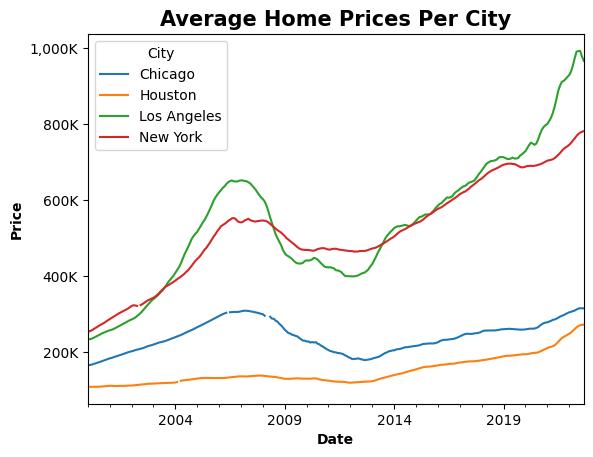

In [12]:
ax = df_unstack['HomePrice'].plot()

fmt_thous = mticks.FuncFormatter(thousands)
ax.yaxis.set_major_formatter(fmt_thous)


ax.set_title('Average Home Prices Per City', fontsize = 15, weight = 'bold')
ax.set_ylabel('Price', fontsize = 10, weight = 'bold')
ax.set_xlabel('Date', fontsize = 10, weight = 'bold')

ax.legend(title = 'City');

## Which City had the highest Typical Home Value at the end of 2008? Which had the least?

In [13]:
df_end = df_sort.loc[pd.IndexSlice[:, '2008-12-31'], :]

df_end

,,HomePrice
RegionName,Date,
Chicago,2008-12-31,265306.0
Houston,2008-12-31,131283.0
Los Angeles,2008-12-31,469294.0
New York,2008-12-31,510309.0


In [14]:
df_city_max = df_end.idxmax()
df_city_min = df_end.idxmin()

print(df_city_max)
print()
print(df_city_min)

HomePrice    (New York, 2008-12-31 00:00:00)
dtype: object

HomePrice    (Houston, 2008-12-31 00:00:00)
dtype: object


### The city with the highest typical home value is New York and the city with the lowest is Houston.

## How much did the home values change from November 2008 to December 2008 (in dollars)?

In [15]:
df_08 = df_sort.loc[pd.IndexSlice[:, ('2008')], :]

df_08

HomePrice
RegionName  Date                 
Chicago     2008-01-31   300207.0
            2008-02-29   296063.0
            2008-03-31        NaN
            2008-04-30        NaN
            2008-05-31   293467.0
            2008-06-30   288495.0
            2008-07-31   288174.0
            2008-08-31   283199.0
            2008-09-30   280695.0
            2008-10-31   274849.0
            2008-11-30   271059.0
            2008-12-31   265306.0
Houston     2008-01-31   138208.0
            2008-02-29   137512.0
            2008-03-31   136795.0
            2008-04-30   136628.0
            2008-05-31   136228.0
            2008-06-30   135773.0
            2008-07-31   135392.0
            2008-08-31   134770.0
            2008-09-30   133932.0
            2008-10-31   133189.0
            2008-11-30   132247.0
            2008-12-31   131283.0
Los Angeles 2008-01-31   603029.0
            2008-02-29   596635.0
            2008-03-31   586065.0
            2008-04-30   571226.0
            2008-05-31   554589.0
            2008-06-30   539622.0
            2008-07-31   524220.0
            2008-08-31   510520.0
            2008-09-30   500124.0
            2008-10-31   490979.0
            2008-11-30   481905.0
            2008-12-31   469294.0
New York    2008-01-31   546538.0
            2008-02-29   546098.0
            2008-03-31   544562.0
            2008-04-30   541865.0
            2008-05-31   537685.0
            2008-06-30   533810.0
            2008-07-31   529211.0
            2008-08-31   525290.0
            2008-09-30   521347.0
            2008-10-31   518048.0
            2008-11-30   514767.0
            2008-12-31   510309.0

In [16]:
df_diff = df_08.diff()
df_diff

HomePrice
RegionName  Date                 
Chicago     2008-01-31        NaN
            2008-02-29    -4144.0
            2008-03-31        NaN
            2008-04-30        NaN
            2008-05-31        NaN
            2008-06-30    -4972.0
            2008-07-31     -321.0
            2008-08-31    -4975.0
            2008-09-30    -2504.0
            2008-10-31    -5846.0
            2008-11-30    -3790.0
            2008-12-31    -5753.0
Houston     2008-01-31  -127098.0
            2008-02-29     -696.0
            2008-03-31     -717.0
            2008-04-30     -167.0
            2008-05-31     -400.0
            2008-06-30     -455.0
            2008-07-31     -381.0
            2008-08-31     -622.0
            2008-09-30     -838.0
            2008-10-31     -743.0
            2008-11-30     -942.0
            2008-12-31     -964.0
Los Angeles 2008-01-31   471746.0
            2008-02-29    -6394.0
            2008-03-31   -10570.0
            2008-04-30   -14839.0
            2008-05-31   -16637.0
            2008-06-30   -14967.0
            2008-07-31   -15402.0
            2008-08-31   -13700.0
            2008-09-30   -10396.0
            2008-10-31    -9145.0
            2008-11-30    -9074.0
            2008-12-31   -12611.0
New York    2008-01-31    77244.0
            2008-02-29     -440.0
            2008-03-31    -1536.0
            2008-04-30    -2697.0
            2008-05-31    -4180.0
            2008-06-30    -3875.0
            2008-07-31    -4599.0
            2008-08-31    -3921.0
            2008-09-30    -3943.0
            2008-10-31    -3299.0
            2008-11-30    -3281.0
            2008-12-31    -4458.0

### Looking at the 2008-12-31 date for every city gives us the the difference from November to December.

### Difference for Chicago is 5753
### Difference for Houston is 964
### Difference for Los Angeles is 12611
### Difference for New York is 4458